<a href="https://colab.research.google.com/github/akshithamaddi/akshithamaddi_INFO5731/blob/master/BerTopic_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("Article_information.csv",encoding="ISO-8859-1")
header = ["Title"]
df.to_csv('output.csv', columns = header)

In [4]:
pip install bertopic

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 6.4MB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 29.5MB/s 
     |████████████████████████████████| 1.2MB 36.9MB/s 
     |████████████████████████████████| 3.2MB 32.5MB/s 
     |████████████████████████████████| 890kB 42.4MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311695 sha256=9a718eaf10b22b212ec3ea88d55dce91e17c31f0a1b98f4dd4ee7f7287a023b9
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-cp37-none-any.whl size=114277 sha256=a646732fc2a06ac7e35f6520d54fcda6dc6ea5450b53c570c570f878805fadc9
  Stored in directory: /root/.cache/pip/wheels/c8/0d/fa/4e2

In [5]:
pip install bertopic[visualization]


     |████████████████████████████████| 13.2MB 339kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
pip install bertopic[flair]

     |████████████████████████████████| 450kB 5.3MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 983kB 46.1MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 798kB 43.7MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp37-none-any.whl size=14376 sha256=76a08a3abd2d112fe93d55213dbfb1ad0093d1e4b8ec948f14c7bf53a5384c12
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for segtok: filename=segtok-1.5.10-cp37-none-any.whl size=25019 sha256=3154ac5ab2d2e72bde0de02f9d84d43ad1b1c81fbc43be32d673fcd0bfa138c9
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=3801a38132f6741bcbe2954256c42c3fddbba0266ac38da32ea16e4819174f5e
  Stored in directory: /root/.cache/pi

In [16]:
from bertopic import BERTopic

df1= pd.read_csv("output.csv")
docs = df1['Title']
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(docs)

In [17]:
topic_model.get_topic_freq().head()

,Topic,Count
0,-1,1748
1,47,195
2,45,141
3,65,130
4,55,109


In [18]:
topic_model.get_topic(49)

[('autocompletion', 0.10087106311259844),
 ('autocorrelation', 0.02943891241485217),
 ('alignmentbased', 0.02943891241485217),
 ('selectively', 0.02943891241485217),
 ('seetoretrieve', 0.02943891241485217),
 ('answering', 0.028397302748446897),
 ('bloomberg', 0.026122418727962483),
 ('queryperformance', 0.02418239428725356),
 ('timesensitive', 0.02418239428725356),
 ('translate', 0.02418239428725356)]

In [20]:
topic_model.visualize_topics()

In [27]:
#Dynamic Topic Modeling
import pandas as pd
df = pd.read_csv("Article_information.csv",encoding="ISO-8859-1")
df.head(1)

,Unnamed: 0,Article_id,Venue,Title,Year,Abstract,Doi,fieldsOfStudy,topics,Downloadurl,TotalCitationCount,TotalDownloadCount,Influentialcitationcount
0,0,https://doi.org/10.1145/511285.511286,SIGIR '71,Introduction and perspectives for the 1971 ACM...,1971,introduction prospectives provided 1971 acm in...,10.1145/511285.511286,Computer Science,"Information retrieval,Document retrieval",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,0,222,0


In [31]:
import re
import pandas as pd
df.Title = df.apply(lambda row: re.sub(r"http\S+", "", row.Title).lower(), 1)
df.text = df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Title.split())), 1)
df.text = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.Title).split()), 1)
year = df.Year.to_list()
title = df.Title.to_list()

In [32]:
from bertopic import BERTopic

model = BERTopic(verbose=True)
topics, _ = model.fit_transform(title)

2021-03-26 18:39:17,083 - BERTopic - Transformed documents to Embeddings


2021-03-26 18:39:27,102 - BERTopic - Reduced dimensionality with UMAP
2021-03-26 18:39:27,337 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [33]:
topics_over_time = model.topics_over_time(title, topics, year)

38it [09:59, 15.77s/it]


In [34]:
model.visualize_topics_over_time(topics_over_time, top_n=6)

In [9]:
#topic Modeling
import pandas as pd
topicm = pd.read_csv("/Article_information.csv",encoding="ISO-8859-1")
header = ["Title"]
topicm.to_csv('output.csv', columns = header)

In [2]:
pip install pyLDAvis==2.1.2

In [3]:
pip install "gensim==3.8.1"

In [4]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [10]:
data = topicm.Title.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['Introduction and perspectives for the 1971 ACM Information Storage and Retrieval Symposium']


In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['introduction', 'and', 'perspectives', 'for', 'the', 'acm', 'information', 'storage', 'and', 'retrieval', 'symposium']]


In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['introduction', 'and', 'perspectives', 'for', 'the', 'acm', 'information', 'storage', 'and', 'retrieval', 'symposium']


In [13]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['introduction', 'perspective', 'acm', 'information', 'storage']]


In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [16]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('acm', 1),
  ('information', 1),
  ('introduction', 1),
  ('perspective', 1),
  ('storage', 1)]]

In [17]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.384*"network" + 0.253*"query" + 0.077*"processing" + 0.030*"tool" + '
  '0.028*"intelligent" + 0.010*"entropy" + 0.009*"intelligence" + '
  '0.003*"maximum" + 0.003*"extend" + 0.001*"boolean"'),
 (1,
  '0.694*"search" + 0.089*"relevance" + 0.050*"term" + 0.019*"weight" + '
  '0.016*"comparison" + 0.012*"frequency" + 0.003*"element" + 0.000*"web" + '
  '0.000*"recommendation" + 0.000*"engine"'),
 (2,
  '0.409*"evaluation" + 0.167*"analysis" + 0.044*"value" + 0.021*"automate" + '
  '0.000*"metric" + 0.000*"web" + 0.000*"sentiment" + 0.000*"effective" + '
  '0.000*"entity" + 0.000*"diversity"'),
 (3,
  '0.428*"document" + 0.107*"structure" + 0.049*"exploit" + 0.042*"collection" '
  '+ 0.008*"invert" + 0.000*"metric" + 0.000*"interactive" + '
  '0.000*"exploration" + 0.000*"distance" + 0.000*"recommendation"'),
 (4,
  '0.597*"use" + 0.032*"incorporate" + 0.022*"strategy" + '
  '0.021*"investigation" + 0.005*"database" + 0.003*"structural" + '
  '0.000*"recommendation" + 0.000*"sp

In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.201139174503425

Coherence Score:  0.5027575991118981


In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.395397  0.178263       1        1  13.910937
7     -0.108784 -0.314560       2        1   9.476957
11    -0.083984 -0.146381       3        1   7.407996
8     -0.040976 -0.033337       4        1   6.712739
0     -0.054977 -0.056131       5        1   6.272380
4      0.037271  0.024454       6        1   5.721683
17     0.007024  0.010997       7        1   5.248509
9      0.012409  0.013614       8        1   5.162654
3      0.051395  0.028756       9        1   5.067592
15     0.019462  0.017374      10        1   5.043147
18     0.022414  0.018442      11        1   4.928044
14     0.014535  0.015402      12        1   4.251141
16     0.048055  0.027710      13        1   3.965609
12     0.053157  0.029468      14        1   3.654350
2      0.049744  0.028274      15        1   3.330029
5      0.067971  0.031902      16        1   3.042233
10     0.074456  0.032162      17        1   2.609759
6      0.066688  0.031708      18        1   2.273354
19     0.075514  0.032037      19        1   1.472488
13     0.084023  0.029848      20        1   0.448399, topic_info=           Term         Freq        Total Category  logprob  loglift
118      search  2231.000000  2231.000000  Default  30.0000  30.0000
77         base  1036.000000  1036.000000  Default  29.0000  29.0000
91          use   789.000000   789.000000  Default  28.0000  28.0000
181       model   798.000000   798.000000  Default  27.0000  27.0000
177       learn   693.000000   693.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
432        news     0.031098     2.060442  Topic20  -8.1102   1.2137
362   selection     0.031098     2.060517  Topic20  -8.1102   1.2137
338      result     0.031098     2.060678  Topic20  -8.1102   1.2136
254    approach     0.031098     2.060868  Topic20  -8.1102   1.2135
1141      aware     0.031098     2.061404  Topic20  -8.1102   1.2132

[783 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
55       12  0.967634       access
238      11  0.965637     adaptive
10       17  0.769928    ambiguity
75       15  0.981412     analysis
230       4  0.974421  application
...     ...       ...          ...
83       15  0.955664        value
155      12  0.956409       vector
145       3  0.973655       visual
214       1  0.976466       weight
74        3  0.983293         word

[139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 12, 9, 1, 5, 18, 10, 4, 16, 19, 15, 17, 13, 3, 6, 11, 7, 20, 14])

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
pip install "gensim==3.8.1"

In [31]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [32]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-26 20:52:17--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.91MB/s    in 1.6s    

2021-03-26 20:52:19 (9.91 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [37]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [38]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(10,
  [('recommendation', 0.15427509293680297),
   ('network', 0.11524163568773234),
   ('social', 0.07156133828996282),
   ('neural', 0.04553903345724907),
   ('adaptive', 0.040892193308550186),
   ('deep', 0.03531598513011153),
   ('personalized', 0.031598513011152414),
   ('attention', 0.026022304832713755),
   ('personalize', 0.023234200743494422),
   ('interest', 0.022304832713754646)]),
 (6,
  [('document', 0.2315882874889086),
   ('structure', 0.064773735581189),
   ('multi', 0.04791481810115351),
   ('graph', 0.0354924578527063),
   ('temporal', 0.031055900621118012),
   ('retrieve', 0.026619343389529725),
   ('multiple', 0.024844720496894408),
   ('sentence', 0.02040816326530612),
   ('multilingual', 0.02040816326530612),
   ('opinion', 0.01685891748003549)]),
 (17,
  [('measure', 0.062157221206581355),
   ('evaluate', 0.05758683729433273),
   ('summarization', 0.055758683729433274),
   ('event', 0.04936014625228519),
   ('news', 0.04570383912248629),
   ('expansion', 0.0383

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [47]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

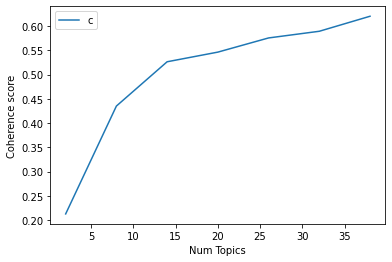

In [48]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [49]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2128
Num Topics = 8  has Coherence Value of 0.4351
Num Topics = 14  has Coherence Value of 0.5264
Num Topics = 20  has Coherence Value of 0.5463
Num Topics = 26  has Coherence Value of 0.5755
Num Topics = 32  has Coherence Value of 0.5892
Num Topics = 38  has Coherence Value of 0.6202


In [50]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.286*"search" + 0.072*"context" + 0.066*"task" + 0.037*"aware" + '
  '0.031*"session" + 0.031*"multi" + 0.031*"personalize" + 0.027*"intent" + '
  '0.026*"graph" + 0.022*"type"'),
 (1,
  '0.099*"term" + 0.056*"evaluate" + 0.055*"selection" + 0.050*"index" + '
  '0.035*"technique" + 0.035*"weight" + 0.026*"fast" + 0.025*"impact" + '
  '0.023*"estimate" + 0.023*"fusion"'),
 (2,
  '0.135*"recommendation" + 0.106*"network" + 0.068*"social" + 0.044*"neural" '
  '+ 0.034*"deep" + 0.032*"aware" + 0.032*"personalized" + 0.024*"multi" + '
  '0.023*"interest" + 0.021*"item"'),
 (3,
  '0.150*"web" + 0.089*"image" + 0.079*"automatic" + 0.064*"content" + '
  '0.044*"event" + 0.043*"application" + 0.030*"page" + 0.027*"annotation" + '
  '0.027*"embedding" + 0.022*"word"'),
 (4,
  '0.193*"rank" + 0.178*"learn" + 0.049*"learning" + 0.036*"machine" + '
  '0.027*"framework" + 0.024*"optimization" + 0.022*"tree" + 0.019*"function" '
  '+ 0.019*"hash" + 0.019*"human"'),
 (5,
  '0.238*"user" + 0.0

In [51]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.0798,"information, system, retrieval, access, enviro...",Introduction and perspectives for the 1971 ACM...
1,1,13.0,0.0818,"semantic, analysis, feature, indexing, link, l...",The function of semantics in automated languag...
2,2,14.0,0.0751,"document, cluster, summarization, representati...",How features resolve syntactic ambiguity
3,3,6.0,0.0685,"relevance, improve, feedback, temporal, score,...",The converse natural language data management ...
4,4,10.0,0.0657,"information, system, retrieval, access, enviro...","CUE: a preprocessor system for restricted, nat..."
5,5,8.0,0.0910,"text, classification, method, word, categoriza...",Full text document retrieval: Hebrew legal tex...
6,6,10.0,0.0609,"information, system, retrieval, access, enviro...",Quantification in Query Systems
7,7,9.0,0.0804,"search, web, result, engine, challenge, intern...",The relational data file and the decision prob...
8,8,12.0,0.0717,"model, language, probabilistic, datum, cluster...",Managing semantic data in an associative net
9,9,2.0,0.0639,"recommendation, network, social, neural, deep,...",A heathkit method for building data management...


In [52]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1648,"search, context, task, aware, session, multi, ...",Personalizing information retrieval for multi-...
1,1.0,0.1384,"term, evaluate, selection, index, technique, w...",Meta-scoring: automatically evaluating term we...
2,2.0,0.1586,"recommendation, network, social, neural, deep,...",Personalized Fashion Recommendation with Visua...
3,3.0,0.1263,"web, image, automatic, content, event, applica...",Exploiting ontologies for automatic image anno...
4,4.0,0.1427,"rank, learn, learning, machine, framework, opt...",A regression framework for learning ranking fu...


In [56]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,10.0,"information, system, retrieval, access, enviro...",297.0,0.0670
1.0,13.0,"semantic, analysis, feature, indexing, link, l...",249.0,0.0562
2.0,14.0,"document, cluster, summarization, representati...",313.0,0.0706
3.0,6.0,"relevance, improve, feedback, temporal, score,...",241.0,0.0544
4.0,10.0,"information, system, retrieval, access, enviro...",270.0,0.0609
5.0,8.0,"text, classification, method, word, categoriza...",214.0,0.0483
6.0,10.0,"information, system, retrieval, access, enviro...",225.0,0.0508
7.0,9.0,"search, web, result, engine, challenge, intern...",237.0,0.0535
8.0,12.0,"model, language, probabilistic, datum, cluster...",249.0,0.0562
9.0,2.0,"recommendation, network, social, neural, deep,...",245.0,0.0553
